# Análisis del archivo XDF

Librerías empleadas

In [1]:
import pyxdf
import mne
from mne.preprocessing import ICA
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import date, datetime, timezone
import pytz
from scipy import stats
import pyedflib
from autoreject import AutoReject
import json


In [6]:
def load_xdf_file(participant:str, task:str, run:str, session:str = 'S001') -> list:
    file_name = f'sub-{participant}_ses-{session}_task-{task}_run-{run}_eeg.xdf'
    dir = rf'C:\Users\adoni\Documents\CurrentStudy\data\eeg\sub-{participant}\ses-{session}\xdf'
    streams, header = pyxdf.load_xdf(os.path.join(dir, file_name), verbose=True)
    return streams, header

def find_stream_number(streams: list, stream_name: str) -> int:
    for i, stream in enumerate(streams):
        if stream_name in stream['info']['name'][0]:
            return i
    return -1

In [3]:
participant = '006'
run = '001'
task = 'eyes_close'

In [9]:
streams, header = pyxdf.load_xdf(r"C:\Users\adoni\Documents\CurrentStudy\data\eeg\sub-006\ses-S001\xdf\sub-dani_ses-S001_task-eyes_open_run-001.xdf", verbose=True)

In [8]:
streams = load_xdf_file(participant, task, run)

Exception: file C:\Users\adoni\Documents\CurrentStudy\data\eeg\sub-006\ses-S001\xdf\sub-006_ses-S001_task-eyes_close_run-001_eeg.xdf does not exist.

In [ ]:
for stream in streams:
    print(stream['info']['name'][0])

Sync
PsychoPyMarkers
Start_Stop
eeg_quality
Markers
eeg_eeg


In [ ]:
eeg_stream['info']['effective_srate']

np.float64(256.0136228147829)

In [ ]:
streams[1]

{'info': defaultdict(list,
             {'name': ['PsychoPyMarkers'],
              'type': ['Markers'],
              'channel_count': ['1'],
              'channel_format': ['string'],
              'source_id': ['psychoEEGAdonis'],
              'nominal_srate': ['0.000000000000000'],
              'version': ['1.100000000000000'],
              'created_at': ['256572.4434992000'],
              'uid': ['ac7b6171-968d-4189-accf-6583534c4395'],
              'session_id': ['default'],
              'hostname': ['ultron'],
              'v4address': [None],
              'v4data_port': ['16577'],
              'v4service_port': ['16577'],
              'v6address': [None],
              'v6data_port': ['16577'],
              'v6service_port': ['16577'],
              'desc': [None],
              'stream_id': 3,
              'effective_srate': 0,
              'segments': []}),
 'footer': {'info': defaultdict(list,
              {'first_timestamp': ['256594.9595607'],
              

### 1.0 Exploración inicial de los streams

Los _streams_ es un objeto de tipo lista que contiene donde cada elemento de la lista es a su vez un diccionario con la información relacionada con ese stream.

In [239]:
streams

[{'info': defaultdict(list,
              {'name': ['Sync'],
               'type': ['Markers'],
               'channel_count': ['1'],
               'channel_format': ['int16'],
               'source_id': ['id23443'],
               'nominal_srate': ['0.000000000000000'],
               'version': ['1.100000000000000'],
               'created_at': ['676276.3755888999'],
               'uid': ['84ae9e15-6405-4d0a-a01a-44fc47d785fa'],
               'session_id': ['default'],
               'hostname': ['ultron'],
               'v4address': [None],
               'v4data_port': ['16572'],
               'v4service_port': ['16572'],
               'v6address': [None],
               'v6data_port': ['16572'],
               'v6service_port': ['16572'],
               'desc': [None],
               'stream_id': 1,
               'effective_srate': 0,
               'segments': []}),
  'footer': {'info': defaultdict(list,
               {'first_timestamp': ['676787.222697'],
           

In [5]:
type(streams)

list

In [77]:
len(streams)

5

In [7]:
streams[0]

{'info': defaultdict(list,
             {'name': ['eeg_quality'],
              'type': ['Markers'],
              'channel_count': ['16'],
              'channel_format': ['int16'],
              'source_id': ['id23443'],
              'nominal_srate': ['0.000000000000000'],
              'version': ['1.100000000000000'],
              'created_at': ['584413.3189219000'],
              'uid': ['ce0b9930-ede3-4342-aeaa-6ccd72a45553'],
              'session_id': ['default'],
              'hostname': ['ultron'],
              'v4address': [None],
              'v4data_port': ['16576'],
              'v4service_port': ['16576'],
              'v6address': [None],
              'v6data_port': ['16576'],
              'v6service_port': ['16576'],
              'desc': [None],
              'stream_id': 5,
              'effective_srate': 0,
              'segments': []}),
 'footer': {'info': defaultdict(list,
              {'first_timestamp': ['586557.365184'],
               'last_timest

`header` no me aporta información así que no lo cargaré por defecto 

In [ ]:
type(header)

dict

In [ ]:
header

{'info': defaultdict(list,
             {'version': ['1.0'], 'datetime': ['2025-04-22T12:11:40+0200']})}

Veamos primero los streams disponibles en mi archivo

In [240]:
for stream in streams:
    print(stream['info']['name'][0])

Sync
eeg_quality
eeg_eeg


In [23]:
for e in streams[0]['footer']['info']:
    print(e)

first_timestamp
last_timestamp
sample_count
clock_offsets


### 1.1. Streams: `eeg_eeg`

In [ ]:
eeg_stream_number = find_stream_number(streams, 'eeg_eeg')
print(f"EEG stream number: {eeg_stream_number}")
eeg_stream = streams[eeg_stream_number]

EEG stream number: 4


In [ ]:
for key in eeg_stream.keys():
    print(key)

info
footer
time_series
time_stamps
clock_times
clock_values


#### 1.1.1 Streams: EGG - `info`

In [16]:
streams[4]

{'info': defaultdict(list,
             {'name': ['eeg_eeg'],
              'type': ['EEG'],
              'channel_count': ['17'],
              'channel_format': ['float32'],
              'source_id': ['eeguid104266'],
              'nominal_srate': ['256.0000000000000'],
              'version': ['1.100000000000000'],
              'created_at': ['31450.44617520000'],
              'uid': ['2d1a05c2-7e06-4e2e-90da-a016ba5a0816'],
              'session_id': ['default'],
              'hostname': ['ultron'],
              'v4address': [None],
              'v4data_port': ['16573'],
              'v4service_port': ['16573'],
              'v6address': [None],
              'v6data_port': ['16573'],
              'v6service_port': ['16573'],
              'desc': [defaultdict(list,
                           {'acquisition': [defaultdict(list,
                                         {'manufacturer': ['Bitbrain']})],
                            'channels': [defaultdict(list,
          

In [89]:
for key, value in eeg_stream['info'].items():
    print(key,':',value[0]) if type(value) == list else print(key,':',value)

name : eeg_eeg
type : EEG
channel_count : 17
channel_format : float32
source_id : eeguid126424
nominal_srate : 256.0000000000000
version : 1.100000000000000
created_at : 584403.3681930000
uid : 365d63b6-d814-42d4-88b3-f5bfe917ab16
session_id : default
hostname : ultron
v4address : None
v4data_port : 16573
v4service_port : 16573
v6address : None
v6data_port : 16573
v6service_port : 16573
desc : defaultdict(<class 'list'>, {'acquisition': [defaultdict(<class 'list'>, {'manufacturer': ['Bitbrain']})], 'channels': [defaultdict(<class 'list'>, {'channel': [defaultdict(<class 'list'>, {'unit': ['uV'], 'type': ['eeg'], 'label': ['Fpz']}), defaultdict(<class 'list'>, {'unit': ['uV'], 'type': ['eeg'], 'label': ['F7']}), defaultdict(<class 'list'>, {'unit': ['uV'], 'type': ['eeg'], 'label': ['F3']}), defaultdict(<class 'list'>, {'unit': ['uV'], 'type': ['eeg'], 'label': ['Fz']}), defaultdict(<class 'list'>, {'unit': ['uV'], 'type': ['eeg'], 'label': ['F4']}), defaultdict(<class 'list'>, {'unit':

Los que realmente nos interesan son:
- name
- type
- channel_count
- channel_format
- nominal_srate
- stream_id?

**Canales EEG**

De los 17 canales, 16 son electrodos EEG que miden actividad cerebral en microvoltios (μV), y el canal 17 parece ser un contador de secuencia:

| Índice | Electrodo | Tipo | Unidad | Ubicación |
|--------|-----------|------|--------|-----------|
| 0 | Fpz | eeg | μV | Frontal polar, línea media |
| 1 | F7 | eeg | μV | Frontal izquierdo |
| 2 | F3 | eeg | μV | Frontal izquierdo (central) |
| 3 | Fz | eeg | μV | Frontal, línea media |
| 4 | F4 | eeg | μV | Frontal derecho (central) |
| 5 | F8 | eeg | μV | Frontal derecho |
| 6 | C3 | eeg | μV | Central izquierdo |
| 7 | Cz | eeg | μV | Central, línea media |
| 8 | C4 | eeg | μV | Central derecho |
| 9 | P7 | eeg | μV | Parietal izquierdo |
| 10 | P3 | eeg | μV | Parietal izquierdo (central) |
| 11 | Pz | eeg | μV | Parietal, línea media |
| 12 | P4 | eeg | μV | Parietal derecho (central) |
| 13 | P8 | eeg | μV | Parietal derecho |
| 14 | O1 | eeg | μV | Occipital izquierdo |
| 15 | O2 | eeg | μV | Occipital derecho |
| 16 | - | sequence number | - | Contador de secuencia |

In [90]:
print(eeg_stream['info']['desc'][0]['channels'][0]['channel'])

[defaultdict(<class 'list'>, {'unit': ['uV'], 'type': ['eeg'], 'label': ['Fpz']}), defaultdict(<class 'list'>, {'unit': ['uV'], 'type': ['eeg'], 'label': ['F7']}), defaultdict(<class 'list'>, {'unit': ['uV'], 'type': ['eeg'], 'label': ['F3']}), defaultdict(<class 'list'>, {'unit': ['uV'], 'type': ['eeg'], 'label': ['Fz']}), defaultdict(<class 'list'>, {'unit': ['uV'], 'type': ['eeg'], 'label': ['F4']}), defaultdict(<class 'list'>, {'unit': ['uV'], 'type': ['eeg'], 'label': ['F8']}), defaultdict(<class 'list'>, {'unit': ['uV'], 'type': ['eeg'], 'label': ['C3']}), defaultdict(<class 'list'>, {'unit': ['uV'], 'type': ['eeg'], 'label': ['Cz']}), defaultdict(<class 'list'>, {'unit': ['uV'], 'type': ['eeg'], 'label': ['C4']}), defaultdict(<class 'list'>, {'unit': ['uV'], 'type': ['eeg'], 'label': ['P7']}), defaultdict(<class 'list'>, {'unit': ['uV'], 'type': ['eeg'], 'label': ['P3']}), defaultdict(<class 'list'>, {'unit': ['uV'], 'type': ['eeg'], 'label': ['Pz']}), defaultdict(<class 'list'>

In [241]:
# Hacer un diccionacio de los nombres de los canales
channel_names = {}
for i, channel in enumerate(eeg_stream['info']['desc'][0]['channels'][0]['channel']):
    channel_names[i] = channel['label'][0]
print(channel_names)

{0: 'Fpz', 1: 'F7', 2: 'F3', 3: 'Fz', 4: 'F4', 5: 'F8', 6: 'C3', 7: 'Cz', 8: 'C4', 9: 'P7', 10: 'P3', 11: 'Pz', 12: 'P4', 13: 'P8', 14: 'O1', 15: 'O2', 16: '17'}


#### 1.1.2 Streams: EGG - `time_series`

In [6]:
eeg_stream = streams[eeg_stream_number]
print('EEG data shape', eeg_stream['time_series'].shape)

EEG data shape (10256, 17)


Esto significa que hay 17 canales. Cada uno de los cuales ha recogido un número de 10256 de puntos en el tiempo o muestras.

Cada punto de datos representa la actividad eléctrica medida por ese electrodo específico en un momento concreto.

La forma de `eeg_stream['time_series']` es (10256, 17), lo que significa:

- **Primera dimensión (10256)**: Representa el número de muestras temporales recogidas para cada canal.
- **Segunda dimensión (17)**: Representa los canales o electrodos del registro EEG.

In [ ]:
def plot_eeg_stream_time_series(eeg_time_series, channel_names=CHANNEL_NAMES):
    time = np.arange(eeg_time_series.shape[0])
    plt.figure(figsize=(15, 10))
    num_channels = eeg_time_series.shape[1]
    for i in range(num_channels):
        signal= eeg_time_series[:, i]
        plt.plot(time, signal, label=channel_names[i])
        # Colocar la etiqueta encima de cada traza (en el primer 5% del eje X)
        x_pos = int(0.01 * len(time))
        y_pos = signal[x_pos]
        plt.text(x_pos, y_pos, channel_names[i], fontsize=10)

    plt.xlabel('Tiempo (muestras)')
    plt.ylabel('Amplitud (uV)')
    plt.title('Señales EEG sin procesar')
    plt.legend(loc='center right')
    plt.tight_layout()
    plt.show()
        

#### Amplitud en EEG

- **Unidad**: La amplitud en los canales EEG se mide en microvoltios (μV).
- **Valores actuales**: Los valores en tus datos parecen estar amplificados (~30,000-60,000) y probablemente necesitan ser convertidos a la escala correcta de microvoltios.
- **Rango típico**: Las señales EEG normalmente tienen amplitudes entre 10 y 100 μV en un registro estándar.

La conversión de los valores crudos a microvoltios dependerá del factor de amplificación específico utilizado en tu sistema de adquisición de Bitbrain.

En estas señales de EEG crudas, los valores pueden parecer muy grandes (observo que están en el rango de 30,000-60,000). Esto podría deberse a que los datos aún no están convertidos a su escala física final. Es posible que el sistema de adquisición guarde los datos en valores enteros amplificados antes de su conversión final a microvoltios.

### 1.2 Streams: `eeg_quality`

El stream `eeg_quality` contiene información sobre la calidad de la señal de EEG para cada uno de los 16 canales en diferentes momentos del registro. 

In [ ]:
eeg_quality = streams[1]
for key in eeg_quality.keys():
    print(key)

info
footer
time_series
time_stamps
clock_times
clock_values


In [252]:
eeg_quality['info']

defaultdict(list,
            {'name': ['Start_Stop'],
             'type': ['Markers'],
             'channel_count': ['1'],
             'channel_format': ['string'],
             'source_id': ['id23443'],
             'nominal_srate': ['0.000000000000000'],
             'version': ['1.100000000000000'],
             'created_at': ['790229.7705827000'],
             'uid': ['717f3870-686d-485e-8103-36ec6fc4e5c6'],
             'session_id': ['default'],
             'hostname': ['ultron'],
             'v4address': [None],
             'v4data_port': ['16574'],
             'v4service_port': ['16574'],
             'v6address': [None],
             'v6data_port': ['16574'],
             'v6service_port': ['16574'],
             'desc': [None],
             'stream_id': 2,
             'effective_srate': 0,
             'segments': []})

Información general (`info`):

- Tipo: "Markers"
- 16 canales (coincide con tu EEG)
- Formato: int16 (valores enteros)
- Frecuencia de muestreo nominal: 0 (indica que no es una señal continua, sino marcadores discretos)

**eeg_quality**: `time_series`

Matriz de 16 filas × 16 columnas (muestras × canales)

Valores:

- 1: very good signal quality
- 2: good signal quality
- 3: bad signal quality
- 4: saturated signal
- 5: no measuraments yet


Patrón: 
Todos los canales excepto el último (canal 16) permanecen en 1, mientras que el canal 16 empieza a degradarse en la tercera muestra. Y empeora en las últimas 3 muestras.

In [253]:
eeg_quality['time_series']

[]

**eeg_quality**: `time_stamps`

Tiempos correspondientes a cada muestra (16 valores)

Desde ~586276s hasta ~586314s (unos 38 segundos de registro)

In [247]:
eeg_quality['time_stamps']

array([676781.22219659, 676783.72264603, 676786.25436945, 676788.78501388,
       676791.3173973 , 676793.84772073, 676796.41059315, 676798.94149857,
       676801.47333   , 676803.97301543, 676806.53568185, 676809.06691528,
       676811.5984977 , 676814.16117412, 676816.63027656, 676819.16104499,
       676821.69155941, 676824.22322084, 676826.75399227, 676829.28500069,
       676831.81721212, 676834.34804254, 676836.87904897])

**Interpretación: calidad por canal:** 

El canal 16 (última columna) es el único que muestra problemas:

- Desde ~586281.49s (3ª muestra): Calidad empieza a degradarse (valor 2)
- Desde ~586309.30s (14ª muestra): Calidad empeora aún más (valor 3)

Los otros 15 canales mantienen calidad óptima (1) durante todo el registro.

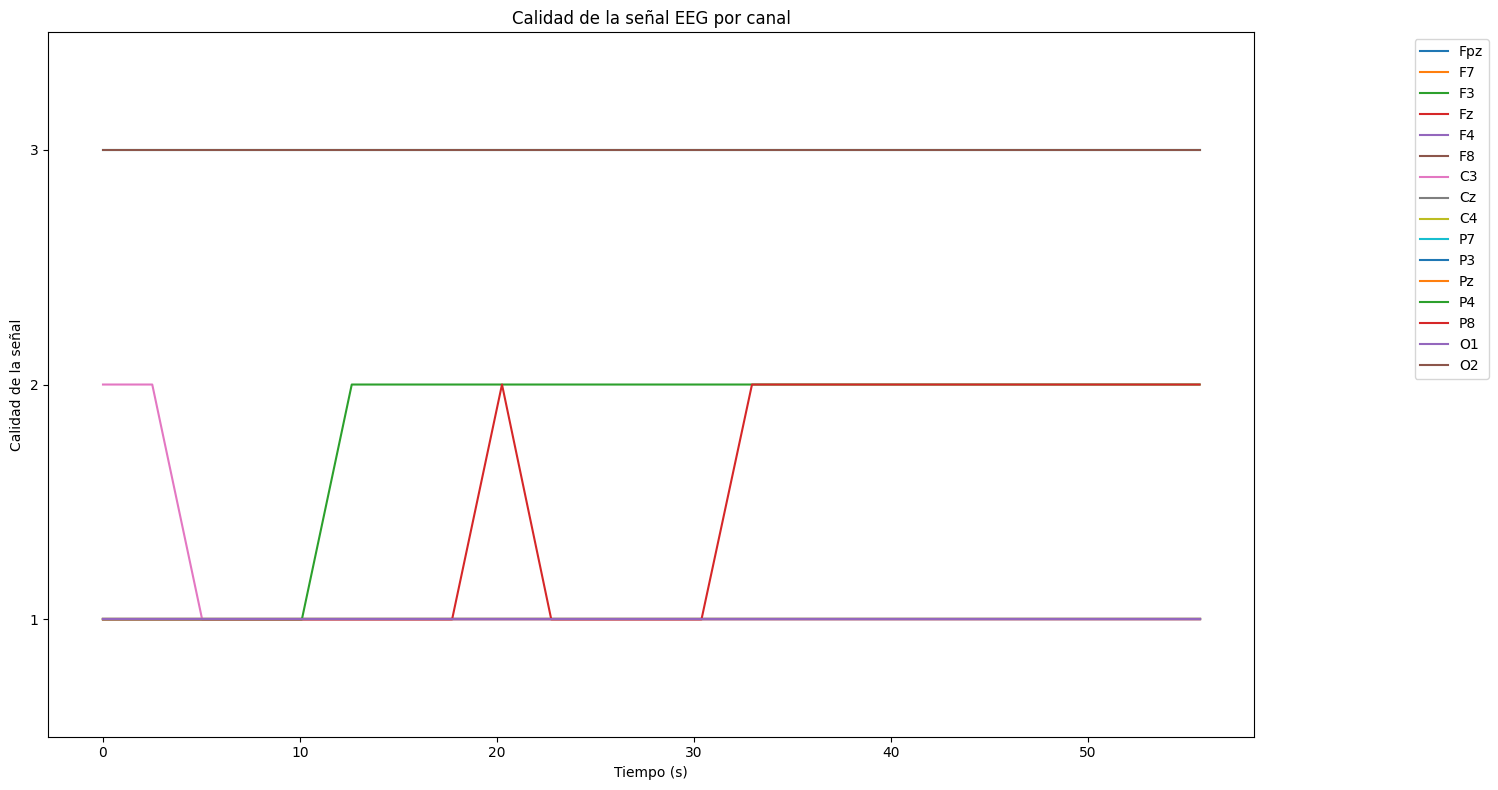

In [ ]:
# Llamar a la función para graficar
plot_signal_quality()

In [ ]:
# Acceder a los marcadores del Stroop
stroop_times = DaniEEGData.stroop_stream['time_stamps']
stroop_markers = DaniEEGData.stroop_stream['time_series']

# Mostrar los primeros 10 marcadores y sus tiempos
for t, m in zip(stroop_times[:10], stroop_markers[:10]):
    print(f"Tiempo: {t:.3f}  -  Marcador: {m[0]}")